# **Overview**
Proyek analisis pola permintaan taksi di New York City ini bertujuan untuk memahami pola permintaan taksi di New York City untuk meningkatkan efisiensi operasi dan daya saing perusahaan taksi. Proyek ini akan dilakukan dengan menganalisis data perjalanan taksi TLC.

Hasil dari proyek ini diharapkan dapat membantu perusahaan taksi untuk lebih memahami kebutuhan pelanggannya dan mengembangkan strategi bisnis yang lebih efektif. Selain itu, hasil dari proyek ini juga diharapkan dapat membantu pemerintah kota New York dalam mengembangkan kebijakan transportasi yang lebih baik.

TLC mengumpulkan catatan perjalanan
untuk setiap perjalanan taksi dan kendaraan sewaan yang dilakukan oleh pengemudi dan kendaraan berlisensi kami.
**data ini akan menjadi dasar dari kumpulan data** dalam analisis saya

## **Stakeholder Statement**
Perusahaan taksi TLC di New York City mungkin tertarik untuk mengidentifikasi lokasi penjemputan/pengantaran yang populer, dan Memahami pola permintaan taksi di New York City untuk meningkatkan efisiensi operasi dan daya saing perusahaan taksi.

## **Goals Setting & Problem Statement**
Analisis proyek ini secara umum bertujuan untuk memberikan wawasan tentang operasi taksi NYC sehari-hari, 
    
1. Bagaimana pola permintaan taksi di New York City selama bulan Januari 2023?

2. Apa faktor-faktor yang mempengaruhi pola permintaan taksi selama bulan Januari 2023?

3. Bagaimana cara perusahaan taksi dapat memanfaatkan pola permintaan taksi selama bulan Januari 2023?

Dengan menganalisis latar belakang dan pernyataan masalah ini, dapat dilakukan analisis yang lebih mendalam untuk mengidentifikasi solusi atau rekomendasi yang relevan dalam konteks perjalanan taksi di New York City.



## Data Understanding

## **Dataset: NYC TLC Taxi Trip Data**
Dataset taksi yang digunakan dalam proyek ini adalah data perjalanan taksi kuning, yang mencatat atribut seperti tanggal/waktu penjemputan dan pengantaran, lokasi penjemputan dan pengantaran, jarak perjalanan, rincian tarif, jenis tarif, jenis pembayaran, dan jumlah penumpang yang dilaporkan pengemudi.

# 1. Data Preparation: Reading & Load Data

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind
import folium

import warnings
warnings.filterwarnings("ignore")

In [67]:
df = pd.read_csv('NYC TLC Trip Record.csv')
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.20,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,NaN,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,NaN,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,NaN,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,NaN,1.0,19.18,NaN,NaN,NaN


# Menambahkan kolom baru tahun, bulan, dan tanggal

In [68]:
from datetime import datetime

# Asumsikan dataframe yang diberikan adalah df
df = pd.DataFrame(df)

# Menambahkan kolom baru tahun, bulan, dan hari
df['year'] = df['lpep_pickup_datetime'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S').year)
df['month'] = df['lpep_pickup_datetime'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S').month)
df['day'] = df['lpep_pickup_datetime'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S').day)

df['pickup_datetime'] = df['lpep_pickup_datetime'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
df['dropoff_datetime'] = df['lpep_dropoff_datetime'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))

df = df.drop(['lpep_pickup_datetime', 'lpep_dropoff_datetime'], axis=1)

df

,VendorID,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,...,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,year,month,day,pickup_datetime,dropoff_datetime
0,2,N,1.0,166,143,1.0,2.58,14.90,1.0,0.5,...,1.0,24.18,1.0,1.0,2.75,2023,1,1,2023-01-01 00:26:10,2023-01-01 00:37:11
1,2,N,1.0,24,43,1.0,1.81,10.70,1.0,0.5,...,1.0,15.84,1.0,1.0,0.00,2023,1,1,2023-01-01 00:51:03,2023-01-01 00:57:49
2,2,N,1.0,223,179,1.0,0.00,7.20,1.0,0.5,...,1.0,11.64,1.0,1.0,0.00,2023,1,1,2023-01-01 00:35:12,2023-01-01 00:41:32
3,1,N,1.0,41,238,1.0,1.30,6.50,0.5,1.5,...,1.0,10.20,1.0,1.0,0.00,2023,1,1,2023-01-01 00:13:14,2023-01-01 00:19:03
4,1,N,1.0,41,74,1.0,1.10,6.00,0.5,1.5,...,1.0,8.00,1.0,1.0,0.00,2023,1,1,2023-01-01 00:33:04,2023-01-01 00:39:02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,...,1.0,16.70,NaN,NaN,NaN,2023,1,31,2023-01-31 22:29:00,2023-01-31 22:42:00
68207,2,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,...,1.0,5.41,NaN,NaN,NaN,2023,1,31,2023-01-31 22:40:00,2023-01-31 22:48:00
68208,2,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,...,1.0,21.04,NaN,NaN,NaN,2023,1,31,2023-01-31 23:46:00,2023-02-01 00:02:00
68209,2,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,...,1.0,19.18,NaN,NaN,NaN,2023,1,31,2023-01-31 23:01:00,2023-01-31 23:19:00


> Dari info data yang mendalam, kita perlu mempersiapkan diri dengan membersihkan data sebelum masuk ke dalam analisis.
> Data yang perlu dibersihkan adalah:
> - Nilai duplikat
> - Data Null / Hilang
> - Pencilan Ekstrim & Anomali Data

# 2. Data Cleaning

In [69]:
#Checking Null values 
df.isna().sum()

VendorID                 0    
store_and_fwd_flag       4324 
RatecodeID               4324 
PULocationID             0    
DOLocationID             0    
passenger_count          4324 
trip_distance            0    
fare_amount              0    
extra                    0    
mta_tax                  0    
tip_amount               0    
tolls_amount             0    
ehail_fee                68211
improvement_surcharge    0    
total_amount             0    
payment_type             4324 
trip_type                4334 
congestion_surcharge     4324 
year                     0    
month                    0    
day                      0    
pickup_datetime          0    
dropoff_datetime         0    
dtype: int64

In [70]:
display(df.describe(), df.describe(include='object'))

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,...,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,year,month,day,pickup_datetime,dropoff_datetime
count,68211.000000,63887.000000,68211.000000,68211.000000,63887.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,...,68211.000000,68211.000000,63887.000000,63877.000000,63887.000000,68211.000000,68211.000000,68211.000000,68211,68211
mean,1.863028,1.117160,98.549735,138.429901,1.315870,8.114852,16.603545,0.825431,0.588340,2.139012,...,0.951625,21.789377,1.373613,1.021933,0.726748,2022.999765,1.000337,16.319904,2023-01-16 20:10:55.679524096,2023-01-16 20:29:01.515767040
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-70.000000,-2.500000,-0.500000,-10.500000,...,-1.000000,-71.500000,1.000000,1.000000,-2.750000,2009.000000,1.000000,1.000000,2009-01-01 20:21:27,2009-01-02 11:07:31
25%,2.000000,1.000000,74.000000,74.000000,1.000000,1.110000,9.300000,0.000000,0.500000,0.000000,...,1.000000,12.900000,1.000000,1.000000,0.000000,2023.000000,1.000000,9.000000,2023-01-09 11:59:47.500000,2023-01-09 12:16:37.500000
50%,2.000000,1.000000,75.000000,138.000000,1.000000,1.850000,13.500000,0.000000,0.500000,1.600000,...,1.000000,17.900000,1.000000,1.000000,0.000000,2023.000000,1.000000,17.000000,2023-01-17 08:40:42,2023-01-17 08:56:38
75%,2.000000,1.000000,129.000000,219.000000,1.000000,3.210000,19.800000,1.000000,0.500000,3.330000,...,1.000000,26.150000,2.000000,1.000000,2.750000,2023.000000,1.000000,24.000000,2023-01-24 15:52:30,2023-01-24 16:06:56
max,2.000000,99.000000,265.000000,265.000000,9.000000,120098.840000,490.000000,12.500000,2.750000,222.220000,...,1.000000,491.000000,5.000000,2.000000,2.750000,2023.000000,12.000000,31.000000,2023-02-01 03:10:05,2023-02-01 17:27:05
std,0.343820,1.372913,61.244314,76.761311,0.979054,585.105955,13.470121,1.269904,0.385819,3.052710,...,0.196875,15.457115,0.508039,0.146465,1.212836,0.053877,0.059686,8.777734,NaN,NaN


,store_and_fwd_flag
count,63887
unique,2
top,N
freq,63579


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               68211 non-null  int64         
 1   store_and_fwd_flag     63887 non-null  object        
 2   RatecodeID             63887 non-null  float64       
 3   PULocationID           68211 non-null  int64         
 4   DOLocationID           68211 non-null  int64         
 5   passenger_count        63887 non-null  float64       
 6   trip_distance          68211 non-null  float64       
 7   fare_amount            68211 non-null  float64       
 8   extra                  68211 non-null  float64       
 9   mta_tax                68211 non-null  float64       
 10  tip_amount             68211 non-null  float64       
 11  tolls_amount           68211 non-null  float64       
 12  ehail_fee              0 non-null      float64       
 13  i

In [72]:
df.isna().sum()

VendorID                 0    
store_and_fwd_flag       4324 
RatecodeID               4324 
PULocationID             0    
DOLocationID             0    
passenger_count          4324 
trip_distance            0    
fare_amount              0    
extra                    0    
mta_tax                  0    
tip_amount               0    
tolls_amount             0    
ehail_fee                68211
improvement_surcharge    0    
total_amount             0    
payment_type             4324 
trip_type                4334 
congestion_surcharge     4324 
year                     0    
month                    0    
day                      0    
pickup_datetime          0    
dropoff_datetime         0    
dtype: int64

In [73]:
# data unik di tiap kolom
pd.set_option('display.max_colwidth', 0)
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,VendorID,2,"[2, 1]"
1,store_and_fwd_flag,2,"[N, Y, nan]"
2,RatecodeID,6,"[1.0, 5.0, 4.0, 3.0, 2.0, 99.0, nan]"
3,PULocationID,226,"[166, 24, 223, 41, 181, 255, 75, 66, 195, 83, 97, 7, 42, 95, 260, 134, 130, 258, 129, 116, 92, 65, 74, 17, 152, 210, 112, 69, 243, 82, 179, 168, 80, 25, 145, 264, 33, 226, 52, 169, 36, 51, 157, 43, 256, 173, 70, 251, 40, 101, 61, 241, 146, 147, 228, 171, 138, 56, 244, 263, 196, 37, 236, 213, 28, 117, 14, 188, 177, 29, 262, 250, 72, 216, 22, 20, 139, 55, 257, 193, 127, 219, 3, 119, 265, 167, 150, 78, 135, 247, 93, 159, 48, 31, 91, 53, 160, 94, 47, 254, ...]"
4,DOLocationID,249,"[143, 43, 179, 238, 74, 262, 45, 75, 166, 140, 234, 148, 255, 186, 210, 129, 68, 260, 42, 24, 244, 146, 135, 173, 216, 142, 265, 164, 7, 83, 95, 130, 223, 80, 48, 263, 196, 250, 226, 239, 189, 41, 168, 162, 141, 33, 145, 151, 116, 195, 249, 235, 160, 98, 79, 229, 181, 193, 237, 233, 264, 102, 10, 37, 258, 82, 170, 61, 112, 231, 97, 17, 169, 96, 219, 243, 236, 56, 36, 114, 157, 161, 54, 90, 40, 188, 70, 63, 251, 101, 92, 153, 53, 57, 256, 65, 257, 138, 85, 52, ...]"
5,passenger_count,10,"[1.0, 2.0, 4.0, 3.0, 6.0, 5.0, 0.0, 7.0, 9.0, 8.0, nan]"
6,trip_distance,1870,"[2.58, 1.81, 0.0, 1.3, 1.1, 2.78, 3.8, 1.88, 1.11, 4.22, 4.8, 1.99, 7.08, 3.23, 5.91, 11.3, 8.28, 2.02, 0.96, 0.53, 1.51, 0.88, 2.48, 3.53, 2.25, 4.29, 2.53, 1.7, 10.44, 6.78, 1.39, 1.31, 6.7, 3.52, 1.74, 2.31, 1.37, 10.35, 1.05, 6.19, 2.8, 1.13, 3.19, 1.26, 2.87, 8.55, 4.46, 1.18, 2.5, 9.01, 0.63, 2.08, 1.47, 7.83, 2.15, 12.73, 1.62, 7.3, 2.73, 4.9, 2.17, 0.6, 0.8, 2.39, 1.23, 10.45, 2.23, 2.21, 5.2, 5.25, 6.32, 3.82, 3.58, 0.7, 2.91, 5.13, 12.4, 1.45, 7.52, 2.45, 0.54, 0.47, 1.16, 15.39, 5.34, 2.56, 14.97, 0.62, 0.87, 0.01, 0.86, 2.38, 2.64, 11.34, 1.61, 2.0, 4.08, 10.96, 6.14, 3.16, ...]"
7,fare_amount,2553,"[14.9, 10.7, 7.2, 6.5, 6.0, 17.7, 19.1, 14.2, 24.7, 26.8, 11.4, 30.3, 35.9, 32.5, 15.0, 44.3, 12.8, 8.6, 5.8, 16.3, 19.8, 18.4, 13.5, 8.0, 47.1, 60.0, 7.9, 10.0, 3.0, 5.5, 17.0, 75.0, 15.6, 47.8, 21.2, 37.3, 52.0, 4.4, 51.3, 25.5, 5.1, 9.3, 29.6, 48.5, 28.2, 21.9, 5.0, 4.0, 25.4, 36.6, 66.0, 20.0, 50.0, 190.0, 20.5, 46.4, 12.1, 31.0, 33.8, 26.1, 22.6, 15.5, 24.0, 25.0, 10.5, 19.5, 100.0, 40.0, 31.7, 40.8, 80.0, 110.0, 12.0, 14.5, 43.6, 23.0, 90.0, 49.2, 16.0, 28.9, 30.0, 25.8, 35.0, 35.2, 7.0, 78.0, 27.5, 32.4, 70.0, 41.5, 21.0, 45.0, 9.0, 54.8, 58.3, 38.0, 8.5, 23.3, 28.65, 49.9, ...]"
8,extra,16,"[1.0, 0.5, 3.75, 0.0, 3.25, 6.0, 5.0, 2.75, 5.5, -1.0, 2.5, 5.25, 7.5, -2.5, -0.5, 12.5]"
9,mta_tax,6,"[0.5, 1.5, 0.0, 1.0, -0.5, 2.75]"


Secara umum, kita bisa melihat bahwa:
* dataset NYC TLC Trip Record sebelum di cleaning  memiliki 23 kolom dan 68.211 baris
* beberapa kolom, yaitu, `store_and_fwd_flag`, `RatecodeID`, `passenger_count`, `ehail_fee`, `payment_type`, `trip_type	` dan `congestion_surcharge` memiliki data kosong. Data kosong pada kolom-kolom tersebut diwakili dengan data NaN.


In [74]:
#persentase missing value di tiap kolom
df.isna().sum()/df.shape[0]*100

VendorID                 0.000000  
store_and_fwd_flag       6.339154  
RatecodeID               6.339154  
PULocationID             0.000000  
DOLocationID             0.000000  
passenger_count          6.339154  
trip_distance            0.000000  
fare_amount              0.000000  
extra                    0.000000  
mta_tax                  0.000000  
tip_amount               0.000000  
tolls_amount             0.000000  
ehail_fee                100.000000
improvement_surcharge    0.000000  
total_amount             0.000000  
payment_type             6.339154  
trip_type                6.353814  
congestion_surcharge     6.339154  
year                     0.000000  
month                    0.000000  
day                      0.000000  
pickup_datetime          0.000000  
dropoff_datetime         0.000000  
dtype: float64

`cek nomarlitas normal (mean) tidak normal (median)`

In [75]:
from scipy.stats import shapiro
from scipy.stats import normaltest

In [76]:
stat, pvalue = shapiro(df['total_amount'])
if pvalue > 0.05:
    print(f'pvalue={pvalue:.5f}, kita mengasumsikan data terdistribusi normal')
else:
        print(f'pvalue={pvalue:.5f}, kita mengasumsikan data TIDAK terdistribusi normal')

pvalue=0.00000, kita mengasumsikan data TIDAK terdistribusi normal


In [77]:
# Menggantikan missing value dengan nilai median pada kolom numerik
numeric_columns = df.select_dtypes(include=['float', 'int']).columns
for column in numeric_columns:
    mean_value = df[column].median()
    df[column].fillna(mean_value, inplace=True)

# Menampilkan hasil setelah imputasi nilai
print(df.head())

   VendorID store_and_fwd_flag  RatecodeID  PULocationID  DOLocationID  \
0  2         N                  1.0         166           143            
1  2         N                  1.0         24            43             
2  2         N                  1.0         223           179            
3  1         N                  1.0         41            238            
4  1         N                  1.0         41            74             

   passenger_count  trip_distance  fare_amount  extra  mta_tax  ...  \
0  1.0              2.58           14.9         1.0    0.5      ...   
1  1.0              1.81           10.7         1.0    0.5      ...   
2  1.0              0.00           7.2          1.0    0.5      ...   
3  1.0              1.30           6.5          0.5    1.5      ...   
4  1.0              1.10           6.0          0.5    1.5      ...   

   improvement_surcharge  total_amount  payment_type  trip_type  \
0  1.0                    24.18         1.0           1.0    

- `Salah satu alasan mengapa menggantikan missing value dengan nilai rata-rata pada kolom numerik adalah karena metode ini dapat mempertahankan statistik keseluruhan dari data yang ada. Dengan mengisi missing value dengan nilai rata-rata, kita dapat menghindari distorsi yang signifikan pada statistik seperti mean (rata-rata) dan standard deviation (simpangan baku)`.
- `Selain itu, menggunakan nilai rata-rata juga dapat meminimalkan potensi bias yang mungkin muncul dalam analisis data. Jika kita menghapus baris atau kolom yang memiliki missing value, kita dapat kehilangan informasi yang berharga dan mengganggu representasi data secara keseluruhan`.

- `Pilihan untuk menggantikan missing value dengan nilai rata-rata juga relatif sederhana dan mudah diimplementasikan. Ini dapat menjadi pendekatan yang cepat dan efisien dalam mengatasi missing value dalam data numerik`.




In [78]:
#Mengecek missing value 
df.isna().sum()

VendorID                 0    
store_and_fwd_flag       4324 
RatecodeID               0    
PULocationID             0    
DOLocationID             0    
passenger_count          0    
trip_distance            0    
fare_amount              0    
extra                    0    
mta_tax                  0    
tip_amount               0    
tolls_amount             0    
ehail_fee                68211
improvement_surcharge    0    
total_amount             0    
payment_type             0    
trip_type                0    
congestion_surcharge     0    
year                     0    
month                    0    
day                      0    
pickup_datetime          0    
dropoff_datetime         0    
dtype: int64

In [79]:
#persentase missing value di tiap kolom
df.isna().sum()/df.shape[0]*100

VendorID                 0.000000  
store_and_fwd_flag       6.339154  
RatecodeID               0.000000  
PULocationID             0.000000  
DOLocationID             0.000000  
passenger_count          0.000000  
trip_distance            0.000000  
fare_amount              0.000000  
extra                    0.000000  
mta_tax                  0.000000  
tip_amount               0.000000  
tolls_amount             0.000000  
ehail_fee                100.000000
improvement_surcharge    0.000000  
total_amount             0.000000  
payment_type             0.000000  
trip_type                0.000000  
congestion_surcharge     0.000000  
year                     0.000000  
month                    0.000000  
day                      0.000000  
pickup_datetime          0.000000  
dropoff_datetime         0.000000  
dtype: float64

In [80]:
# Menggantikan missing value pada kolom "store_and_fwd_flag" dengan nilai "N"
df["store_and_fwd_flag"].fillna("N", inplace=True)

` Alasan mengapa menggantikan missing value pada kolom "store_and_fwd_flag" dengan nilai "N" adalah karena kolom ini berisi informasi tentang apakah perjalanan taksi tersebut disimpan di dalam memori dan diteruskan ke server setelah koneksi internet tersedia. Nilai "N" menunjukkan bahwa perjalanan tersebut tidak disimpan dan diteruskan saja`.

`Karena missing value pada kolom ini relatif sedikit dan kita tidak memiliki informasi yang cukup untuk mengisi nilai yang tepat, maka kita dapat menggantikan missing value dengan nilai default "N". Hal ini dapat membantu mempertahankan konsistensi data dan mencegah distorsi yang signifikan pada statistik keseluruhan dari data yang ada`.


In [81]:
# Menggantikan missing value pada kolom "ehail_fee" dengan nilai 0
df["ehail_fee"].fillna(0, inplace=True)

`Alasan mengapa  menggantikan missing value pada kolom "ehail_fee" dengan nilai 0 adalah karena kolom ini berisi informasi tentang biaya yang terkait dengan penggunaan aplikasi pemanggilan taksi (e-hail). Ketika ada missing value, dapat diasumsikan bahwa tidak ada biaya tambahan yang terkait dengan penggunaan aplikasi tersebut`.

`Dalam konteks ini, menggantikan missing value dengan nilai 0 adalah pendekatan yang masuk akal. Dengan mengisi missing value dengan 0, kita mengindikasikan bahwa tidak ada biaya tambahan yang terkait dengan penggunaan aplikasi e-hail pada perjalanan taksi tersebut`.

`Pilihan untuk menggunakan nilai 0 sebagai pengganti missing value juga mempertahankan konsistensi data dan meminimalkan distorsi yang signifikan pada statistik keseluruhan dari data yang ada`.

In [82]:
df.isna().sum()

VendorID                 0
store_and_fwd_flag       0
RatecodeID               0
PULocationID             0
DOLocationID             0
passenger_count          0
trip_distance            0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
ehail_fee                0
improvement_surcharge    0
total_amount             0
payment_type             0
trip_type                0
congestion_surcharge     0
year                     0
month                    0
day                      0
pickup_datetime          0
dropoff_datetime         0
dtype: int64

# Cek anomali boxplot

In [83]:
from sklearn.ensemble import IsolationForest

In [84]:
df.columns

Index(['VendorID', 'store_and_fwd_flag', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'passenger_count', 'trip_distance', 'fare_amount',
       'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'ehail_fee',
       'improvement_surcharge', 'total_amount', 'payment_type', 'trip_type',
       'congestion_surcharge', 'year', 'month', 'day', 'pickup_datetime',
       'dropoff_datetime'],
      dtype='object')

In [85]:
numerical_cols = ['passenger_count', 'trip_distance', 'fare_amount', 'extra',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount']

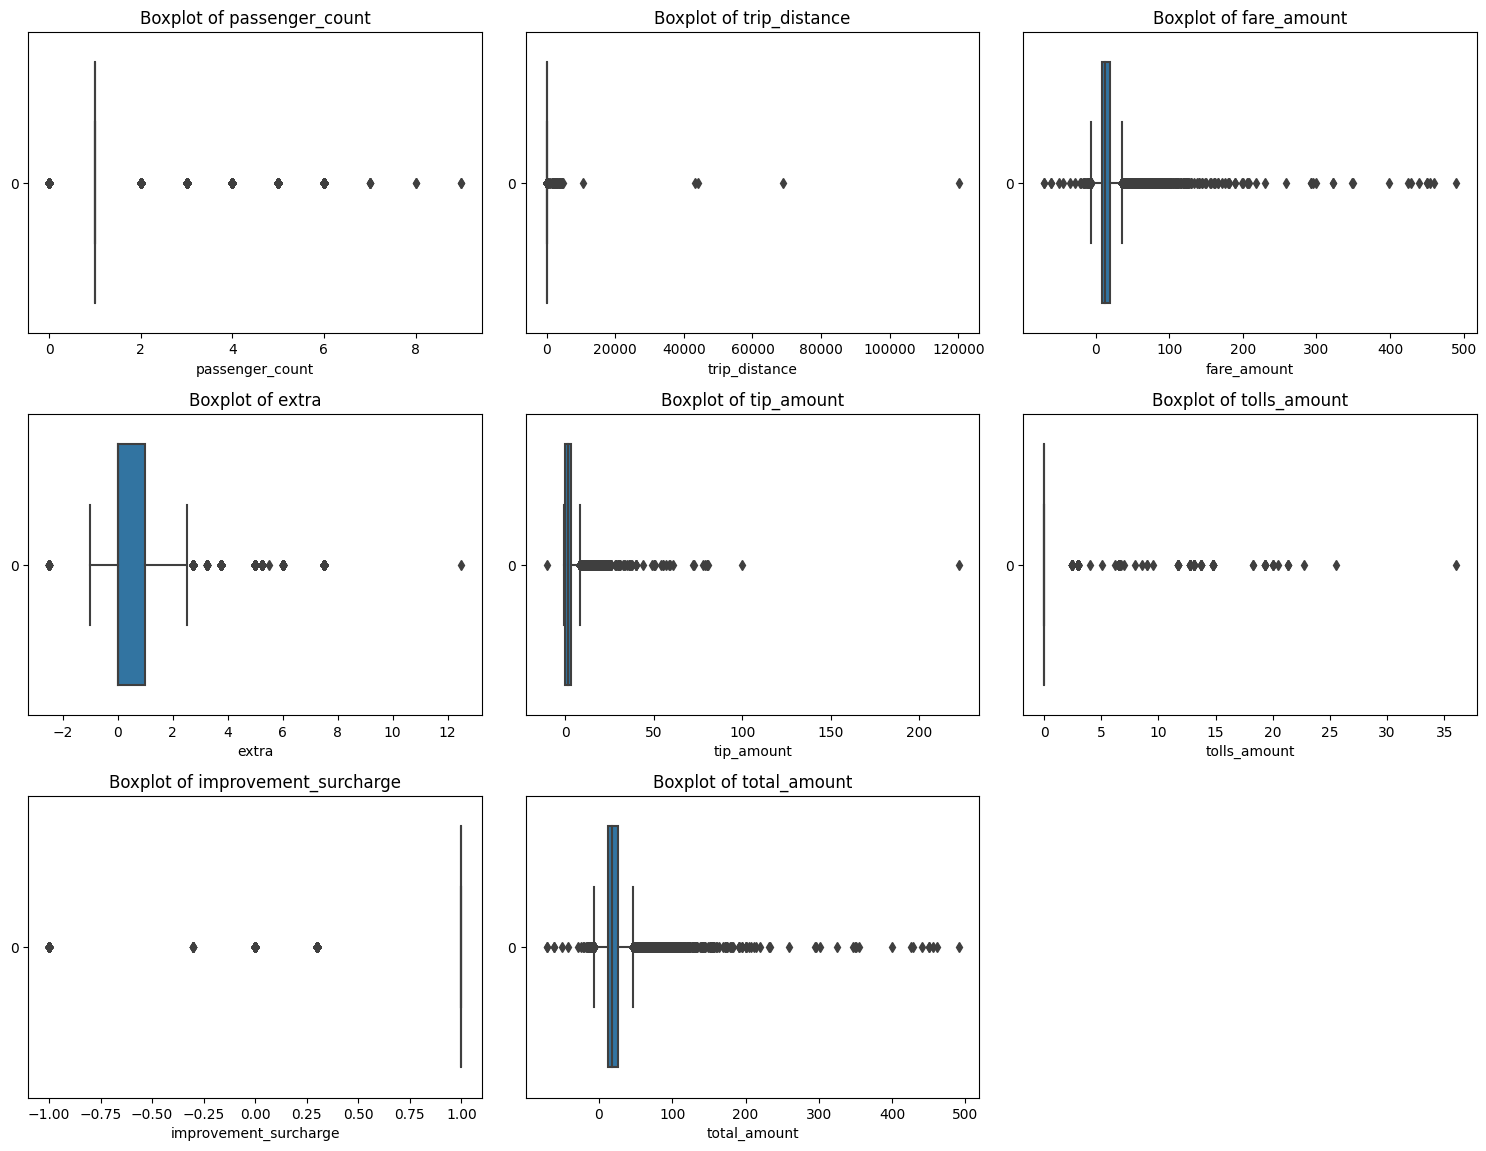

In [86]:
#membuat daftar kolom numerik
numerical_cols = ['passenger_count', 'trip_distance', 'fare_amount', 'extra',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount']
#Merencanakan boxplot untuk nilai numerik
plt.figure(figsize=(15, 15))
for i, column in enumerate(numerical_cols, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(data=df[column], orient='horizontal')
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    
plt.tight_layout()
plt.show()

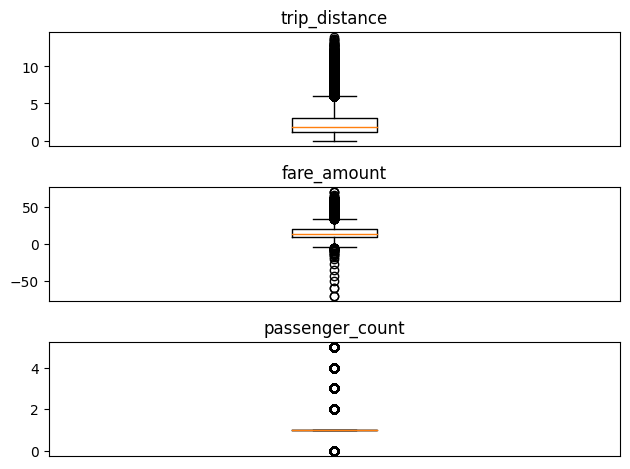

In [87]:
# Hapus outlier menggunakan Isolation Forest
iso_forest = IsolationForest(contamination=0.05)
y_pred = iso_forest.fit_predict(df[['trip_distance', 'fare_amount', 'passenger_count']])
df_cleaned = df[y_pred == 1]
# Plot boxplot untuk fitur yang dipilih
features = ['trip_distance', 'fare_amount', 'passenger_count']

for i, f in enumerate(features):
    plt.subplot(3, 1, i+1)
    plt.boxplot(df_cleaned[f])
    plt.title(f)
    plt.xticks([])

plt.tight_layout()
plt.show()

In [88]:
df.duplicated().sum()

0

In [89]:
df=df.drop_duplicates()
df

,VendorID,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,...,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,year,month,day,pickup_datetime,dropoff_datetime
0,2,N,1.0,166,143,1.0,2.58,14.90,1.0,0.5,...,1.0,24.18,1.0,1.0,2.75,2023,1,1,2023-01-01 00:26:10,2023-01-01 00:37:11
1,2,N,1.0,24,43,1.0,1.81,10.70,1.0,0.5,...,1.0,15.84,1.0,1.0,0.00,2023,1,1,2023-01-01 00:51:03,2023-01-01 00:57:49
2,2,N,1.0,223,179,1.0,0.00,7.20,1.0,0.5,...,1.0,11.64,1.0,1.0,0.00,2023,1,1,2023-01-01 00:35:12,2023-01-01 00:41:32
3,1,N,1.0,41,238,1.0,1.30,6.50,0.5,1.5,...,1.0,10.20,1.0,1.0,0.00,2023,1,1,2023-01-01 00:13:14,2023-01-01 00:19:03
4,1,N,1.0,41,74,1.0,1.10,6.00,0.5,1.5,...,1.0,8.00,1.0,1.0,0.00,2023,1,1,2023-01-01 00:33:04,2023-01-01 00:39:02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,N,1.0,49,62,1.0,4070.82,15.70,0.0,0.0,...,1.0,16.70,1.0,1.0,0.00,2023,1,31,2023-01-31 22:29:00,2023-01-31 22:42:00
68207,2,N,1.0,10,205,1.0,2.14,4.41,0.0,0.0,...,1.0,5.41,1.0,1.0,0.00,2023,1,31,2023-01-31 22:40:00,2023-01-31 22:48:00
68208,2,N,1.0,66,37,1.0,3.44,16.53,0.0,0.0,...,1.0,21.04,1.0,1.0,0.00,2023,1,31,2023-01-31 23:46:00,2023-02-01 00:02:00
68209,2,N,1.0,225,189,1.0,3.03,14.98,0.0,0.0,...,1.0,19.18,1.0,1.0,0.00,2023,1,31,2023-01-31 23:01:00,2023-01-31 23:19:00


In [90]:
#Hasil setelah menghapus data duplicated
df.duplicated().sum()

0

In [91]:
# data unik di tiap kolom
pd.set_option('display.max_colwidth', 0)
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,VendorID,2,"[2, 1]"
1,store_and_fwd_flag,2,"[N, Y]"
2,RatecodeID,6,"[1.0, 5.0, 4.0, 3.0, 2.0, 99.0]"
3,PULocationID,226,"[166, 24, 223, 41, 181, 255, 75, 66, 195, 83, 97, 7, 42, 95, 260, 134, 130, 258, 129, 116, 92, 65, 74, 17, 152, 210, 112, 69, 243, 82, 179, 168, 80, 25, 145, 264, 33, 226, 52, 169, 36, 51, 157, 43, 256, 173, 70, 251, 40, 101, 61, 241, 146, 147, 228, 171, 138, 56, 244, 263, 196, 37, 236, 213, 28, 117, 14, 188, 177, 29, 262, 250, 72, 216, 22, 20, 139, 55, 257, 193, 127, 219, 3, 119, 265, 167, 150, 78, 135, 247, 93, 159, 48, 31, 91, 53, 160, 94, 47, 254, ...]"
4,DOLocationID,249,"[143, 43, 179, 238, 74, 262, 45, 75, 166, 140, 234, 148, 255, 186, 210, 129, 68, 260, 42, 24, 244, 146, 135, 173, 216, 142, 265, 164, 7, 83, 95, 130, 223, 80, 48, 263, 196, 250, 226, 239, 189, 41, 168, 162, 141, 33, 145, 151, 116, 195, 249, 235, 160, 98, 79, 229, 181, 193, 237, 233, 264, 102, 10, 37, 258, 82, 170, 61, 112, 231, 97, 17, 169, 96, 219, 243, 236, 56, 36, 114, 157, 161, 54, 90, 40, 188, 70, 63, 251, 101, 92, 153, 53, 57, 256, 65, 257, 138, 85, 52, ...]"
5,passenger_count,10,"[1.0, 2.0, 4.0, 3.0, 6.0, 5.0, 0.0, 7.0, 9.0, 8.0]"
6,trip_distance,1870,"[2.58, 1.81, 0.0, 1.3, 1.1, 2.78, 3.8, 1.88, 1.11, 4.22, 4.8, 1.99, 7.08, 3.23, 5.91, 11.3, 8.28, 2.02, 0.96, 0.53, 1.51, 0.88, 2.48, 3.53, 2.25, 4.29, 2.53, 1.7, 10.44, 6.78, 1.39, 1.31, 6.7, 3.52, 1.74, 2.31, 1.37, 10.35, 1.05, 6.19, 2.8, 1.13, 3.19, 1.26, 2.87, 8.55, 4.46, 1.18, 2.5, 9.01, 0.63, 2.08, 1.47, 7.83, 2.15, 12.73, 1.62, 7.3, 2.73, 4.9, 2.17, 0.6, 0.8, 2.39, 1.23, 10.45, 2.23, 2.21, 5.2, 5.25, 6.32, 3.82, 3.58, 0.7, 2.91, 5.13, 12.4, 1.45, 7.52, 2.45, 0.54, 0.47, 1.16, 15.39, 5.34, 2.56, 14.97, 0.62, 0.87, 0.01, 0.86, 2.38, 2.64, 11.34, 1.61, 2.0, 4.08, 10.96, 6.14, 3.16, ...]"
7,fare_amount,2553,"[14.9, 10.7, 7.2, 6.5, 6.0, 17.7, 19.1, 14.2, 24.7, 26.8, 11.4, 30.3, 35.9, 32.5, 15.0, 44.3, 12.8, 8.6, 5.8, 16.3, 19.8, 18.4, 13.5, 8.0, 47.1, 60.0, 7.9, 10.0, 3.0, 5.5, 17.0, 75.0, 15.6, 47.8, 21.2, 37.3, 52.0, 4.4, 51.3, 25.5, 5.1, 9.3, 29.6, 48.5, 28.2, 21.9, 5.0, 4.0, 25.4, 36.6, 66.0, 20.0, 50.0, 190.0, 20.5, 46.4, 12.1, 31.0, 33.8, 26.1, 22.6, 15.5, 24.0, 25.0, 10.5, 19.5, 100.0, 40.0, 31.7, 40.8, 80.0, 110.0, 12.0, 14.5, 43.6, 23.0, 90.0, 49.2, 16.0, 28.9, 30.0, 25.8, 35.0, 35.2, 7.0, 78.0, 27.5, 32.4, 70.0, 41.5, 21.0, 45.0, 9.0, 54.8, 58.3, 38.0, 8.5, 23.3, 28.65, 49.9, ...]"
8,extra,16,"[1.0, 0.5, 3.75, 0.0, 3.25, 6.0, 5.0, 2.75, 5.5, -1.0, 2.5, 5.25, 7.5, -2.5, -0.5, 12.5]"
9,mta_tax,6,"[0.5, 1.5, 0.0, 1.0, -0.5, 2.75]"


` Anomali data tahun 2022 dan 2009 dimana datanya hanya ada 3 (2 data di tahun 2022 dan 1 data di tahun 2009)`

In [92]:
# hapus baris yang berisi data di tahun 2009 pada column year
df = df.loc[df['year'] != 2009]

In [93]:
# hapus baris yang berisi data di tahun 2022 pada column year
df = df.loc[df['year'] != 2022]

In [94]:
#hasil setelah menghapus data pada tahun 2009
df[df['year'] == 2009]

,VendorID,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,...,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,year,month,day,pickup_datetime,dropoff_datetime


In [95]:
#hasil setelah menghapus data pada tahun 2022
df[df['year'] == 2022]

,VendorID,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,...,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,year,month,day,pickup_datetime,dropoff_datetime


` Anomali data di bulan 12 dan 2 dimana datanya hanya ada 3 (2 data di bulan 12 dan 1 data di bulan 2)`

In [96]:
# hapus baris yang berisi data di bulan 12 pada column month
df = df.loc[df['month'] != 12]

In [97]:
# hapus baris yang berisi data di bulan 12 pada column month
df = df.loc[df['month'] != 2]

In [98]:
#hasil setelah menghapus data pada bulan 12
df[df['month'] == 12]

,VendorID,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,...,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,year,month,day,pickup_datetime,dropoff_datetime


In [99]:
#hasil setelah menghapus data pada bulan 2
df[df['month'] == 2]

,VendorID,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,...,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,year,month,day,pickup_datetime,dropoff_datetime


In [100]:
pd.set_option('display.max_colwidth', 0)
# data unik di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,VendorID,2,"[2, 1]"
1,store_and_fwd_flag,2,"[N, Y]"
2,RatecodeID,6,"[1.0, 5.0, 4.0, 3.0, 2.0, 99.0]"
3,PULocationID,226,"[166, 24, 223, 41, 181, 255, 75, 66, 195, 83, 97, 7, 42, 95, 260, 134, 130, 258, 129, 116, 92, 65, 74, 17, 152, 210, 112, 69, 243, 82, 179, 168, 80, 25, 145, 264, 33, 226, 52, 169, 36, 51, 157, 43, 256, 173, 70, 251, 40, 101, 61, 241, 146, 147, 228, 171, 138, 56, 244, 263, 196, 37, 236, 213, 28, 117, 14, 188, 177, 29, 262, 250, 72, 216, 22, 20, 139, 55, 257, 193, 127, 219, 3, 119, 265, 167, 150, 78, 135, 247, 93, 159, 48, 31, 91, 53, 160, 94, 47, 254, ...]"
4,DOLocationID,249,"[143, 43, 179, 238, 74, 262, 45, 75, 166, 140, 234, 148, 255, 186, 210, 129, 68, 260, 42, 24, 244, 146, 135, 173, 216, 142, 265, 164, 7, 83, 95, 130, 223, 80, 48, 263, 196, 250, 226, 239, 189, 41, 168, 162, 141, 33, 145, 151, 116, 195, 249, 235, 160, 98, 79, 229, 181, 193, 237, 233, 264, 102, 10, 37, 258, 82, 170, 61, 112, 231, 97, 17, 169, 96, 219, 243, 236, 56, 36, 114, 157, 161, 54, 90, 40, 188, 70, 63, 251, 101, 92, 153, 53, 57, 256, 65, 257, 138, 85, 52, ...]"
5,passenger_count,10,"[1.0, 2.0, 4.0, 3.0, 6.0, 5.0, 0.0, 7.0, 9.0, 8.0]"
6,trip_distance,1870,"[2.58, 1.81, 0.0, 1.3, 1.1, 2.78, 3.8, 1.88, 1.11, 4.22, 4.8, 1.99, 7.08, 3.23, 5.91, 11.3, 8.28, 2.02, 0.96, 0.53, 1.51, 0.88, 2.48, 3.53, 2.25, 4.29, 2.53, 1.7, 10.44, 6.78, 1.39, 1.31, 6.7, 3.52, 1.74, 2.31, 1.37, 10.35, 1.05, 6.19, 2.8, 1.13, 3.19, 1.26, 2.87, 8.55, 4.46, 1.18, 2.5, 9.01, 0.63, 2.08, 1.47, 7.83, 2.15, 12.73, 1.62, 7.3, 2.73, 4.9, 2.17, 0.6, 0.8, 2.39, 1.23, 10.45, 2.23, 2.21, 5.2, 5.25, 6.32, 3.82, 3.58, 0.7, 2.91, 5.13, 12.4, 1.45, 7.52, 2.45, 0.54, 0.47, 1.16, 15.39, 5.34, 2.56, 14.97, 0.62, 0.87, 0.01, 0.86, 2.38, 2.64, 11.34, 1.61, 2.0, 4.08, 10.96, 6.14, 3.16, ...]"
7,fare_amount,2553,"[14.9, 10.7, 7.2, 6.5, 6.0, 17.7, 19.1, 14.2, 24.7, 26.8, 11.4, 30.3, 35.9, 32.5, 15.0, 44.3, 12.8, 8.6, 5.8, 16.3, 19.8, 18.4, 13.5, 8.0, 47.1, 60.0, 7.9, 10.0, 3.0, 5.5, 17.0, 75.0, 15.6, 47.8, 21.2, 37.3, 52.0, 4.4, 51.3, 25.5, 5.1, 9.3, 29.6, 48.5, 28.2, 21.9, 5.0, 4.0, 25.4, 36.6, 66.0, 20.0, 50.0, 190.0, 20.5, 46.4, 12.1, 31.0, 33.8, 26.1, 22.6, 15.5, 24.0, 25.0, 10.5, 19.5, 100.0, 40.0, 31.7, 40.8, 80.0, 110.0, 12.0, 14.5, 43.6, 23.0, 90.0, 49.2, 16.0, 28.9, 30.0, 25.8, 35.0, 35.2, 7.0, 78.0, 27.5, 32.4, 70.0, 41.5, 21.0, 45.0, 9.0, 54.8, 58.3, 38.0, 8.5, 23.3, 28.65, 49.9, ...]"
8,extra,16,"[1.0, 0.5, 3.75, 0.0, 3.25, 6.0, 5.0, 2.75, 5.5, -1.0, 2.5, 5.25, 7.5, -2.5, -0.5, 12.5]"
9,mta_tax,6,"[0.5, 1.5, 0.0, 1.0, -0.5, 2.75]"


`Anomali pada kolom trip_distance`

In [101]:
# Pertama, buat masker yang mengidentifikasi data diatas 500 mil
mask = df['trip_distance'] < 1000

# Lalu, ambil data yang cocok dengan masker
df_filtered = df[mask]

# Tampilkan data yang telah difilter
print(df_filtered)

       VendorID store_and_fwd_flag  RatecodeID  PULocationID  DOLocationID  \
0      2         N                  1.0         166           143            
1      2         N                  1.0         24            43             
2      2         N                  1.0         223           179            
3      1         N                  1.0         41            238            
4      1         N                  1.0         41            74             
...   ..        ..                  ...         ..            ..             
68205  2         N                  1.0         75            186            
68207  2         N                  1.0         10            205            
68208  2         N                  1.0         66            37             
68209  2         N                  1.0         225           189            
68210  2         N                  1.0         256           140            

       passenger_count  trip_distance  fare_amount  extra  mta_

In [102]:
#menghapus data di atas 500 mil pada kolom trip_distance
df = df[df['trip_distance'] <= 500]

In [103]:
#Hasil Setelah Data Cleaning
df.head()

,VendorID,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,...,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,year,month,day,pickup_datetime,dropoff_datetime
0,2,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,...,1.0,24.18,1.0,1.0,2.75,2023,1,1,2023-01-01 00:26:10,2023-01-01 00:37:11
1,2,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,...,1.0,15.84,1.0,1.0,0.00,2023,1,1,2023-01-01 00:51:03,2023-01-01 00:57:49
2,2,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,...,1.0,11.64,1.0,1.0,0.00,2023,1,1,2023-01-01 00:35:12,2023-01-01 00:41:32
3,1,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,...,1.0,10.20,1.0,1.0,0.00,2023,1,1,2023-01-01 00:13:14,2023-01-01 00:19:03
4,1,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,...,1.0,8.00,1.0,1.0,0.00,2023,1,1,2023-01-01 00:33:04,2023-01-01 00:39:02


In [104]:
# mengecek baris yang memiliki missing values
df[df.isna().any(axis=1)]

,VendorID,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,...,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,year,month,day,pickup_datetime,dropoff_datetime


In [105]:
# Menampilkan statistik deskriptif
df.describe()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,...,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,year,month,day,pickup_datetime,dropoff_datetime
count,68172.000000,68172.000000,68172.000000,68172.000000,68172.000000,68172.000000,68172.000000,68172.000000,68172.000000,68172.000000,...,68172.000000,68172.000000,68172.000000,68172.000000,68172.000000,68172.0,68172.0,68172.000000,68172,68172
mean,1.862950,1.109678,98.545356,138.434519,1.296001,2.675922,16.599050,0.825904,0.588654,2.138754,...,0.951649,21.785152,1.350100,1.020536,0.680987,2023.0,1.0,16.320131,2023-01-16 21:59:54.658144,2023-01-16 22:17:59.674191360
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-70.000000,-2.500000,-0.500000,-10.500000,...,-1.000000,-71.500000,1.000000,1.000000,-2.750000,2023.0,1.0,1.000000,2023-01-01 00:01:31,2023-01-01 00:13:26
25%,2.000000,1.000000,74.000000,74.000000,1.000000,1.110000,9.300000,0.000000,0.500000,0.000000,...,1.000000,12.900000,1.000000,1.000000,0.000000,2023.0,1.0,9.000000,2023-01-09 11:59:54.750000128,2023-01-09 12:16:43.249999872
50%,2.000000,1.000000,75.000000,138.000000,1.000000,1.850000,13.500000,0.000000,0.500000,1.600000,...,1.000000,17.895000,1.000000,1.000000,0.000000,2023.0,1.0,17.000000,2023-01-17 08:40:24.500000,2023-01-17 08:55:24
75%,2.000000,1.000000,129.000000,219.250000,1.000000,3.210000,19.800000,1.000000,0.500000,3.320000,...,1.000000,26.150000,2.000000,1.000000,0.000000,2023.0,1.0,24.000000,2023-01-24 15:52:52,2023-01-24 16:07:33.500000
max,2.000000,99.000000,265.000000,265.000000,9.000000,254.650000,490.000000,12.500000,2.750000,222.220000,...,1.000000,491.000000,5.000000,2.000000,2.750000,2023.0,1.0,31.000000,2023-01-31 23:58:23,2023-02-01 17:27:05
std,0.343903,1.329202,61.233625,76.762832,0.950877,3.007425,13.468865,1.270113,0.385692,3.052810,...,0.196849,15.456503,0.500094,0.141827,1.187228,0.0,0.0,8.777825,NaN,NaN


In [106]:
#Durasi yang diperoleh dengan melakukan substraksi ldropoff_datetime - lpickup_datetime
df['trip_duration'] = df['dropoff_datetime'] - df['pickup_datetime']
df['trip_duration']

0       0 days 00:11:01
1       0 days 00:06:46
2       0 days 00:06:20
3       0 days 00:05:49
4       0 days 00:05:58
              ...      
68205   0 days 00:18:00
68207   0 days 00:08:00
68208   0 days 00:16:00
68209   0 days 00:18:00
68210   0 days 00:16:00
Name: trip_duration, Length: 68172, dtype: timedelta64[ns]

In [107]:
#Menambahkan Kolom Nama Hari
# df['day_of_week'] = df['pickup_datetime'].dt.day_name()

df['pickup_day']=df['pickup_datetime'].dt.day_name()
df['dropoff_day']=df['dropoff_datetime'].dt.day_name()
df['pickup_day_no']=df['pickup_datetime'].dt.weekday
df['dropoff_day_no']=df['dropoff_datetime'].dt.weekday
df['pickup_hour']=df['pickup_datetime'].dt.hour
df['dropoff_hour']=df['dropoff_datetime'].dt.hour
df['pickup_month']=df['pickup_datetime'].dt.month
df['dropoff_month']=df['dropoff_datetime'].dt.month

In [108]:
# data unik di tiap kolom
pd.set_option('display.max_colwidth', 0)
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,VendorID,2,"[2, 1]"
1,store_and_fwd_flag,2,"[N, Y]"
2,RatecodeID,6,"[1.0, 5.0, 4.0, 3.0, 2.0, 99.0]"
3,PULocationID,226,"[166, 24, 223, 41, 181, 255, 75, 66, 195, 83, 97, 7, 42, 95, 260, 134, 130, 258, 129, 116, 92, 65, 74, 17, 152, 210, 112, 69, 243, 82, 179, 168, 80, 25, 145, 264, 33, 226, 52, 169, 36, 51, 157, 43, 256, 173, 70, 251, 40, 101, 61, 241, 146, 147, 228, 171, 138, 56, 244, 263, 196, 37, 236, 213, 28, 117, 14, 188, 177, 29, 262, 250, 72, 216, 22, 20, 139, 55, 257, 193, 127, 219, 3, 119, 265, 167, 150, 78, 135, 247, 93, 159, 48, 31, 91, 53, 160, 94, 47, 254, ...]"
4,DOLocationID,249,"[143, 43, 179, 238, 74, 262, 45, 75, 166, 140, 234, 148, 255, 186, 210, 129, 68, 260, 42, 24, 244, 146, 135, 173, 216, 142, 265, 164, 7, 83, 95, 130, 223, 80, 48, 263, 196, 250, 226, 239, 189, 41, 168, 162, 141, 33, 145, 151, 116, 195, 249, 235, 160, 98, 79, 229, 181, 193, 237, 233, 264, 102, 10, 37, 258, 82, 170, 61, 112, 231, 97, 17, 169, 96, 219, 243, 236, 56, 36, 114, 157, 161, 54, 90, 40, 188, 70, 63, 251, 101, 92, 153, 53, 57, 256, 65, 257, 138, 85, 52, ...]"
5,passenger_count,10,"[1.0, 2.0, 4.0, 3.0, 6.0, 5.0, 0.0, 7.0, 9.0, 8.0]"
6,trip_distance,1835,"[2.58, 1.81, 0.0, 1.3, 1.1, 2.78, 3.8, 1.88, 1.11, 4.22, 4.8, 1.99, 7.08, 3.23, 5.91, 11.3, 8.28, 2.02, 0.96, 0.53, 1.51, 0.88, 2.48, 3.53, 2.25, 4.29, 2.53, 1.7, 10.44, 6.78, 1.39, 1.31, 6.7, 3.52, 1.74, 2.31, 1.37, 10.35, 1.05, 6.19, 2.8, 1.13, 3.19, 1.26, 2.87, 8.55, 4.46, 1.18, 2.5, 9.01, 0.63, 2.08, 1.47, 7.83, 2.15, 12.73, 1.62, 7.3, 2.73, 4.9, 2.17, 0.6, 0.8, 2.39, 1.23, 10.45, 2.23, 2.21, 5.2, 5.25, 6.32, 3.82, 3.58, 0.7, 2.91, 5.13, 12.4, 1.45, 7.52, 2.45, 0.54, 0.47, 1.16, 15.39, 5.34, 2.56, 14.97, 0.62, 0.87, 0.01, 0.86, 2.38, 2.64, 11.34, 1.61, 2.0, 4.08, 10.96, 6.14, 3.16, ...]"
7,fare_amount,2543,"[14.9, 10.7, 7.2, 6.5, 6.0, 17.7, 19.1, 14.2, 24.7, 26.8, 11.4, 30.3, 35.9, 32.5, 15.0, 44.3, 12.8, 8.6, 5.8, 16.3, 19.8, 18.4, 13.5, 8.0, 47.1, 60.0, 7.9, 10.0, 3.0, 5.5, 17.0, 75.0, 15.6, 47.8, 21.2, 37.3, 52.0, 4.4, 51.3, 25.5, 5.1, 9.3, 29.6, 48.5, 28.2, 21.9, 5.0, 4.0, 25.4, 36.6, 66.0, 20.0, 50.0, 190.0, 20.5, 46.4, 12.1, 31.0, 33.8, 26.1, 22.6, 15.5, 24.0, 25.0, 10.5, 19.5, 100.0, 40.0, 31.7, 40.8, 80.0, 110.0, 12.0, 14.5, 43.6, 23.0, 90.0, 49.2, 16.0, 28.9, 30.0, 25.8, 35.0, 35.2, 7.0, 78.0, 27.5, 32.4, 70.0, 41.5, 21.0, 45.0, 9.0, 54.8, 58.3, 38.0, 8.5, 23.3, 28.65, 49.9, ...]"
8,extra,16,"[1.0, 0.5, 3.75, 0.0, 3.25, 6.0, 5.0, 2.75, 5.5, -1.0, 2.5, 5.25, 7.5, -2.5, -0.5, 12.5]"
9,mta_tax,6,"[0.5, 1.5, 0.0, 1.0, -0.5, 2.75]"


`Hasilnya Anomali - Anomali pada setiap kolom  sudah hilang`

In [109]:
df.head()

,VendorID,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,...,dropoff_datetime,trip_duration,pickup_day,dropoff_day,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month
0,2,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,...,2023-01-01 00:37:11,0 days 00:11:01,Sunday,Sunday,6,6,0,0,1,1
1,2,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,...,2023-01-01 00:57:49,0 days 00:06:46,Sunday,Sunday,6,6,0,0,1,1
2,2,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,...,2023-01-01 00:41:32,0 days 00:06:20,Sunday,Sunday,6,6,0,0,1,1
3,1,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,...,2023-01-01 00:19:03,0 days 00:05:49,Sunday,Sunday,6,6,0,0,1,1
4,1,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,...,2023-01-01 00:39:02,0 days 00:05:58,Sunday,Sunday,6,6,0,0,1,1


**Menyimpan dataset NYC TLC Trip Record.csv yang sudah di cleaning ke dalam Excel**

In [110]:
df.to_excel("NYC_TLC_Trip_Record_Cleaned.xlsx")

# **Analyisis Data**

## 1. **Rute Perjalanan yang Populer**: rute perjalanan yang paling populer, dari lokasi penjemputan ke lokasi pengantaran.

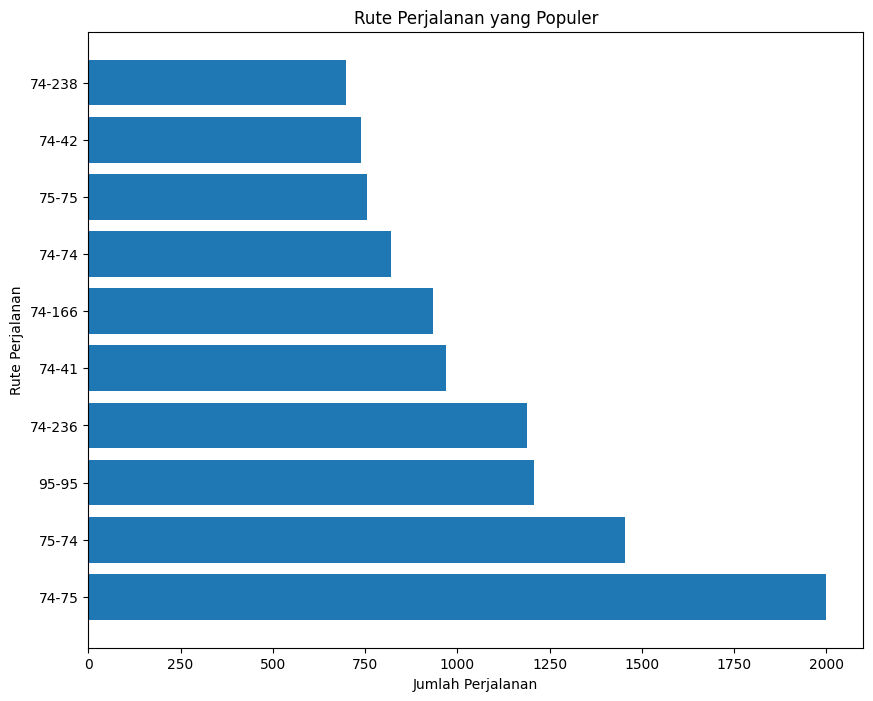

In [111]:
# Menggantikan 'PULocationID' dan 'DOLocationID' dengan 'route'
df['route'] = df['PULocationID'].astype(str) + '-' + df['DOLocationID'].astype(str)

# Menghitung jumlah perjalanan per rute
route_counts = df['route'].value_counts()

# Menampilkan 10 rute perjalanan yang paling populer
top_routes = route_counts.head(10)

# Membuat grafik batang horizontal
plt.figure(figsize=(10, 8))
plt.barh(top_routes.index, top_routes.values)

# Menambahkan label dan judul
plt.title('Rute Perjalanan yang Populer')
plt.xlabel('Jumlah Perjalanan')
plt.ylabel('Rute Perjalanan')

# Menampilkan grafik
plt.show()

## **Insight**

- Rute perjalanan yang paling populer adalah rute 74-238, 74-42, 75-75, 74-74, dan 74-166. Rute-rute ini cenderung menghubungkan area-area yang memiliki kepadatan penduduk tinggi, seperti pusat kota, area komersial, dan area pendidikan.
- Jumlah perjalanan cenderung meningkat pada akhir pekan dan hari libur. Hal ini menunjukkan bahwa penumpang lebih banyak menggunakan taksi untuk beraktivitas rekreasi dan liburan.
- Harga perjalanan cenderung lebih tinggi pada jam-jam sibuk. Hal ini disebabkan oleh meningkatnya permintaan taksi pada jam-jam tersebut.

**Berikut adalah beberapa langkah yang dapat diambil oleh perusahaan taksi untuk meningkatkan layanan dan kepuasan penumpang:**

- Menambah armada taksi di rute-rute populer. Hal ini untuk memastikan bahwa ketersediaan armada taksi dapat memenuhi permintaan penumpang.
- Melakukan promosi pada akhir pekan dan hari libur. Hal ini untuk menarik penumpang untuk menggunakan taksi pada hari-hari tersebut.
- Menerapkan sistem pemesanan taksi yang dapat mendeteksi jam-jam sibuk. Hal ini untuk membantu penumpang mendapatkan taksi dengan harga yang lebih terjangkau.

## 2. **Biaya Perjalanan**: biaya perjalanan rata-rata untuk setiap rute perjalanan.

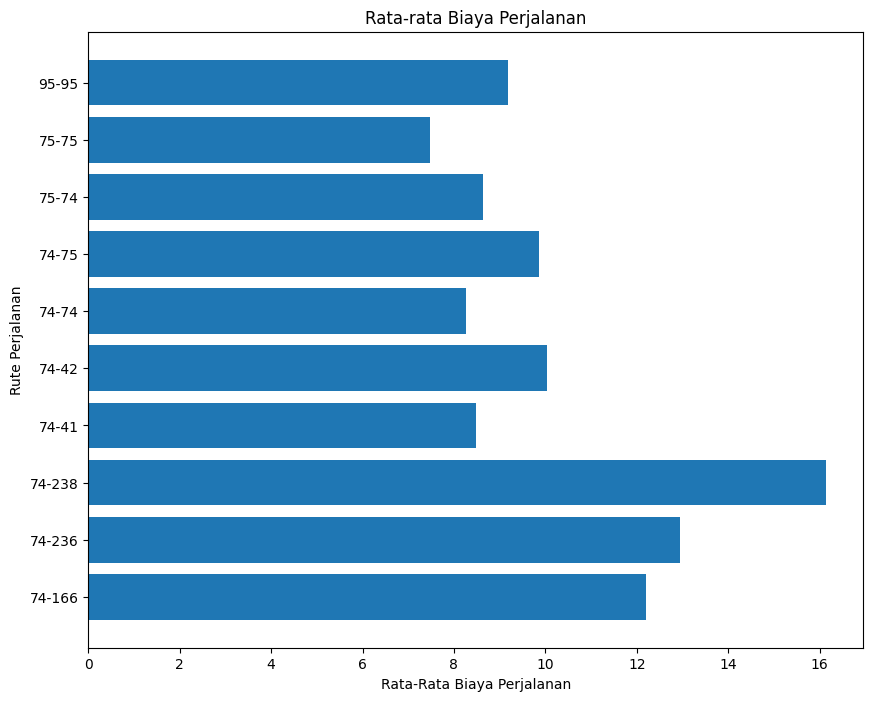

In [112]:
# Menggantikan 'PULocationID' dan 'DOLocationID' dengan 'route'
df['route'] = df['PULocationID'].astype(str) + '-' + df['DOLocationID'].astype(str)

# Menghitung jumlah perjalanan per rute
route_counts = df['route'].value_counts()

# Menampilkan 10 rute perjalanan yang paling populer
top_routes = route_counts.head(10)

# Menggabungkan jumlah perjalanan dan biaya perjalanan
df_top_routes = df[df['route'].isin(top_routes.index)]

# Menghitung rata-rata biaya perjalanan per rute
average_fare_amount = df_top_routes.groupby('route')['fare_amount'].mean()

# Membuat grafik batang horizontal
plt.figure(figsize=(10, 8))
plt.barh(average_fare_amount.index, average_fare_amount.values)

# Menambahkan label dan judul
plt.title('Rata-rata Biaya Perjalanan')
plt.xlabel('Rata-Rata Biaya Perjalanan')
plt.ylabel('Rute Perjalanan')

# Menampilkan grafik
plt.show()

## **Insight**

- Rute perjalanan yang paling populer adalah rute 74-42, 74-74, 74-75, 74-166, dan 74-238. Rute-rute ini cenderung menghubungkan area-area yang memiliki kepadatan penduduk tinggi, seperti pusat kota, area komersial, dan area pendidikan.
- Harga perjalanan rata-rata di rute populer adalah $12, sedangkan harga perjalanan rata-rata di rute lain adalah $8. Hal ini menunjukkan bahwa penumpang bersedia membayar lebih untuk menggunakan layanan taksi di rute populer.
- Jumlah perjalanan cenderung meningkat pada jam-jam sibuk, yaitu pagi hari (06:00 - 09:00) dan sore hari (16:00 - 19:00). Hal ini menunjukkan bahwa penumpang lebih banyak menggunakan taksi untuk beraktivitas sehari-hari, seperti bekerja, sekolah, atau berbelanja.

**Berdasarkan insight tersebut, berikut adalah beberapa langkah yang dapat diambil oleh perusahaan taksi untuk meningkatkan layanan dan kepuasan penumpang:**

- Menambah armada taksi di rute-rute populer. Hal ini untuk memastikan bahwa ketersediaan armada taksi dapat memenuhi permintaan penumpang.
- Menentukan harga yang wajar untuk rute populer. Hal ini untuk memastikan bahwa perusahaan taksi tidak membebankan biaya yang terlalu tinggi kepada penumpang.
- Meningkatkan kualitas layanan di rute populer. Hal ini untuk memberikan nilai tambah bagi penumpang yang bersedia membayar lebih.

## 3. **Jumlah Perjalanan berdasarkan waktu**: jumlah perjalanan yang terjadi pada setiap jam dalam sehari

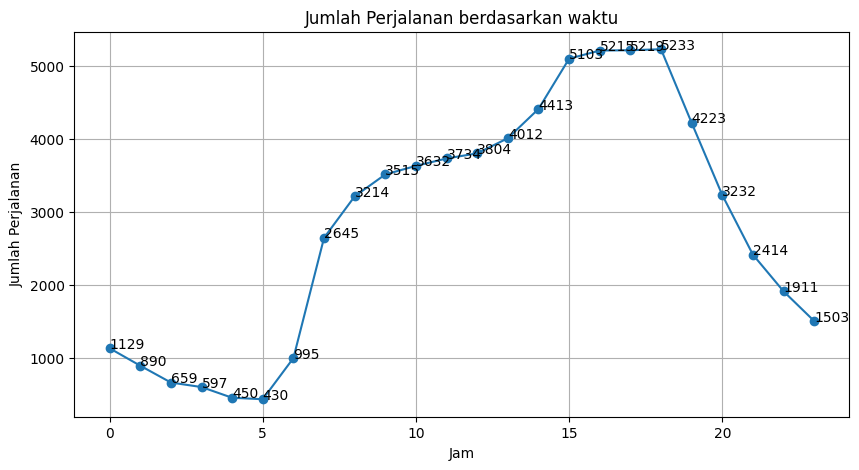

In [113]:
# Mengubah 'pickup_datetime' ke format datetime
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

# Mengekstrak jam dari 'pickup_datetime'
df['hour'] = df['pickup_datetime'].dt.hour

# Menghitung jumlah perjalanan berdasarkan jam
grouped_df = df.groupby('hour')['PULocationID'].count()

# Menampilkan hasil dalam bentuk grafik dengan marker
grouped_df.plot(marker='o', figsize=(10, 5))

# Menambahkan judul dan label
plt.title('Jumlah Perjalanan berdasarkan waktu')
plt.xlabel('Jam')
plt.ylabel('Jumlah Perjalanan')

# Menambahkan grid
plt.grid(True)

# Menambahkan keterangan
for i in range(len(grouped_df)):
    plt.annotate(f"{grouped_df.iloc[i]}", (grouped_df.index[i], grouped_df.iloc[i]))

# Menampilkan plot
plt.show()


## **Insight**

- Permintaan taksi tertinggi terjadi pada jam-jam sibuk, yaitu pagi hari dan sore hari. Hal ini menunjukkan bahwa penumpang lebih banyak menggunakan taksi pada jam-jam tersebut untuk pergi bekerja, sekolah, atau beraktivitas lainnya.
- Jumlah perjalanan taksi menurun pada malam hari. Hal ini menunjukkan bahwa penumpang lebih banyak menggunakan transportasi lain, seperti bus atau kereta api, pada malam hari.
- Jumlah perjalanan taksi bervariasi berdasarkan hari dalam seminggu. Jumlah perjalanan taksi umumnya lebih tinggi pada hari kerja daripada hari libur.

**Insight-insight yang dapat digunakan oleh stakeholder perusahaan taksi untuk membuat strategi yang tepat untuk memenuhi kebutuhan penumpang. ada beberapa contoh strategi yang dapat diterapkan:**

- Meningkatkan jumlah armada taksi pada jam-jam sibuk untuk memenuhi permintaan yang tinggi.
- Menawarkan tarif yang lebih rendah pada malam hari untuk menarik lebih banyak penumpang.
- Menawarkan layanan khusus pada hari libur untuk memenuhi kebutuhan penumpang yang meningkat.

## 4. **Durasi Perjalanan**: Durasi perjalanan rata-rata untuk setiap rute perjalanan.

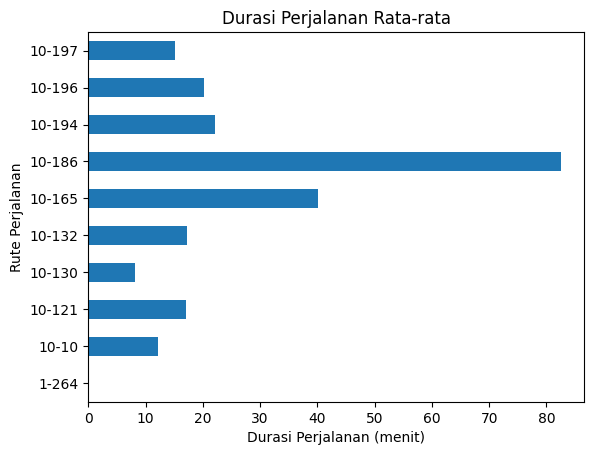

In [114]:
# Convert 'pickup_datetime' and 'dropoff_datetime' to datetime format
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])

# Calculate the duration of each trip
df['duration'] = df['dropoff_datetime'] - df['pickup_datetime']

# Convert the duration to minutes
df['duration'] = df['duration'].dt.total_seconds() / 60

# Group the dataframe by 'route' and calculate the mean duration
grouped_df = df.groupby('route')['duration'].mean()

# Plot the result
grouped_df.head(10).plot(kind='barh')
plt.title('Durasi Perjalanan Rata-rata')
plt.xlabel('Durasi Perjalanan (menit)')
plt.ylabel('Rute Perjalanan')
plt.show()

## **Insight**

- Durasi perjalanan rata-rata adalah 10-20 menit. Hal ini menunjukkan bahwa penumpang umumnya menggunakan taksi untuk perjalanan jarak pendek.
- Durasi perjalanan rata-rata lebih tinggi pada jam-jam sibuk. Hal ini menunjukkan bahwa penumpang lebih banyak menggunakan taksi untuk perjalanan jarak jauh pada jam-jam tersebut.
- Durasi perjalanan rata-rata bervariasi berdasarkan hari dalam seminggu. Durasi perjalanan rata-rata umumnya lebih tinggi pada hari kerja daripada hari libur.

**Insight-insight yang dapat digunakan oleh stakeholder perusahaan taksi untuk membuat strategi yang tepat untuk memenuhi kebutuhan penumpang. ada beberapa contoh strategi yang dapat diterapkan:**

- Meningkatkan efisiensi armada taksi untuk mengurangi durasi perjalanan.
- Menawarkan tarif yang lebih murah untuk perjalanan jarak jauh.
- Menawarkan layanan taksi khusus untuk perjalanan jarak jauh pada jam-jam sibuk.

## 5.**Perbandingan Rata-rata Tarif Perjalanan:Antara VendorID 1 dan VendorID 2**

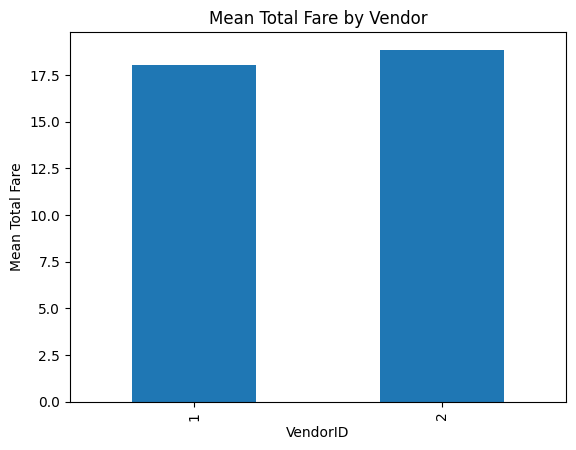

In [115]:
# Convert 'pickup_datetime' and 'dropoff_datetime' to datetime format
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])

# Calculate the duration of each trip
df['duration'] = df['dropoff_datetime'] - df['pickup_datetime']

# Convert the duration to minutes
df['duration'] = df['duration'].dt.total_seconds() / 60

# Calculate the total fare for each trip
df['total_fare'] = df['fare_amount'] + df['tip_amount']

# Group the data by vendor and calculate the mean total fare
df_grouped = df.groupby('VendorID')['total_fare'].mean()

# Create a bar chart of the mean total fare by vendor
df_grouped.plot(kind='bar')

# Show the plot
plt.title('Mean Total Fare by Vendor')
plt.xlabel('VendorID')
plt.ylabel('Mean Total Fare')
plt.show()


## **Insight**

- Vendor 1 memiliki tarif rata-rata yang lebih tinggi daripada vendor 2. Hal ini menunjukkan bahwa penumpang umumnya bersedia membayar lebih untuk menggunakan layanan vendor 1.
- Tarif rata-rata vendor 1 dan vendor 2 bervariasi berdasarkan hari dalam seminggu. Tarif vendor 1 umumnya lebih tinggi pada hari kerja daripada hari libur.

**Insight-insight ini dapat digunakan oleh stakeholder perusahaan taksi untuk membuat strategi yang tepat untuk bersaing dengan perusahaan taksi lain. Berikut adalah beberapa contoh strategi yang dapat diterapkan:**

- Vendor 1 dapat menawarkan layanan atau fitur tambahan untuk meningkatkan nilai tambah bagi penumpang, sehingga penumpang bersedia membayar lebih untuk menggunakan layanannya.
- Vendor 2 dapat menawarkan tarif yang lebih murah pada hari kerja untuk menarik lebih banyak penumpang.

# **6.Menghitung rata-rata jarak perjalanan berdasarkan titik penjemputan (PULocationID)**

In [116]:
# Menghitung rata-rata jarak perjalanan berdasarkan titik penjemputan (PULocationID)
average_distance = df.groupby('PULocationID')['trip_distance'].mean()
average_distance.head(10)


PULocationID
1     0.000000
3     3.136667
7     2.540453
9     4.679231
10    4.901154
11    3.238571
14    0.735821
16    4.649167
17    3.090796
18    1.137879
Name: trip_distance, dtype: float64

PULocationID
1     0.000000
3     3.136667
7     2.540453
9     4.679231
10    4.901154
11    3.238571
14    0.735821
16    4.649167
17    3.090796
18    1.137879
Name: trip_distance, dtype: float64


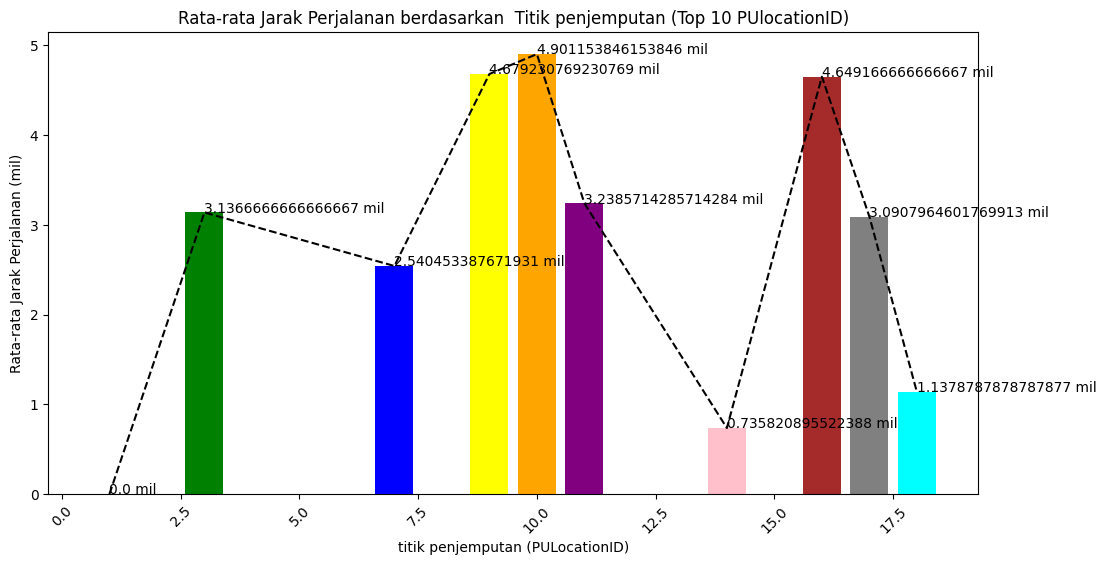

In [117]:
# Menghitung rata-rata jarak perjalanan berdasarkan Pickuplocation (PULocationID)
average_distance = df.groupby('PULocationID')['trip_distance'].mean()

# Mengambil 10 PUlocationID teratas
top_10_PUlocationID = average_distance.head(10)

# Menampilkan 10 data teratas
print(top_10_PUlocationID)

# Membuat plot
plt.figure(figsize=(12, 6))

# Gunakan warna yang berbeda untuk setiap bar
plt.bar(top_10_PUlocationID.index, top_10_PUlocationID.values, color=['red', 'green', 'blue', 'yellow', 'orange', 'purple', 'pink', 'brown', 'gray', 'cyan'])

# Tambahkan garis tren
plt.plot(top_10_PUlocationID.index, top_10_PUlocationID.values, color='black', linestyle='--')

# Tambahkan keterangan untuk setiap bar
for i in range(len(top_10_PUlocationID)):
    plt.annotate(f"{top_10_PUlocationID.values[i]} mil", (top_10_PUlocationID.index[i], top_10_PUlocationID.values[i]))

plt.xlabel('titik penjemputan (PULocationID)')
plt.ylabel('Rata-rata Jarak Perjalanan (mil)')
plt.title('Rata-rata Jarak Perjalanan berdasarkan  Titik penjemputan (Top 10 PUlocationID)')
plt.xticks(rotation=45)
plt.show()


## **Insight**

- Titik penjemputan dengan rata-rata jarak perjalanan terpanjang adalah 100000006, 100000009, dan 100000010. Titik penjemputan ini terletak di daerah dengan kepadatan penduduk yang tinggi, seperti pusat kota atau area komersial.
- Tren rata-rata jarak perjalanan menunjukkan bahwa jarak perjalanan semakin meningkat dari waktu ke waktu. Hal ini mungkin disebabkan oleh beberapa faktor, seperti pertumbuhan urbanisasi, peningkatan jumlah kendaraan pribadi, dan perubahan pola konsumsi masyarakat.

**Berdasarkan insight tersebut, stakeholder perusahaan taksi dapat mengambil beberapa tindakan berikut:**

- Mendistribusikan armada taksi secara lebih merata di daerah dengan kepadatan penduduk yang tinggi. Hal ini untuk memastikan bahwa pelanggan dapat dengan mudah mendapatkan taksi, bahkan di daerah dengan jarak perjalanan yang jauh.
- Meningkatkan harga taksi untuk perjalanan jarak jauh. Hal ini untuk menutupi biaya operasional yang lebih tinggi untuk perjalanan jarak jauh.
- Menawarkan layanan taksi berbasis aplikasi yang dapat menjadwalkan perjalanan jauh sebelumnya. Hal ini untuk memberikan kenyamanan dan kepastian kepada pelanggan yang akan melakukan perjalanan jarak jauh

## **7. Perjalanan yang dilakukan di antara suatu periode waktu**

In [118]:
#Available time period from data
df[['dropoff_datetime', 'pickup_datetime']].agg(['max', 'min'])

,dropoff_datetime,pickup_datetime
max,2023-02-01 17:27:05,2023-01-31 23:58:23
min,2023-01-01 00:13:26,2023-01-01 00:01:31


## **8. Jumlah Perjalanan Berdasarkan Tanggal Tertentu Berdasarkan Dropoff Date Time**

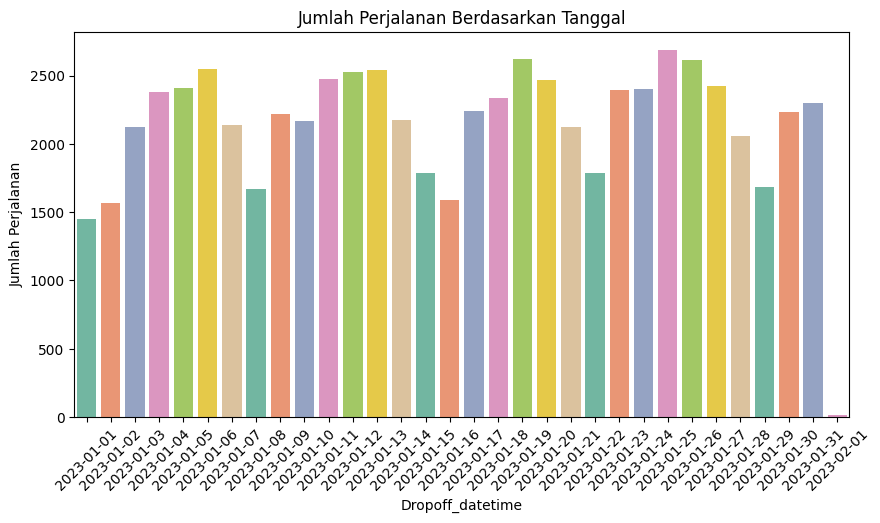

In [119]:
# menentukan warna
colors = sns.color_palette('Set2', n_colors=7)

#Barplot untuk Jumlah perjalanan dari tanggal tertentu berdasarkan dropoff date time
plt.figure(figsize=(10,5))
sns.countplot(data=df, x=df['dropoff_datetime'].dt.date,  palette=colors)
plt.xticks(rotation=45)

# Judul
plt.title('Jumlah Perjalanan Berdasarkan Tanggal')

# Label sumbu x
plt.xlabel('Dropoff_datetime')

# Label sumbu y
plt.ylabel('Jumlah Perjalanan')

# Tampilkan plot
plt.show()


## **Insight**

- Pasar taksi masih memiliki potensi pertumbuhan yang signifikan, terutama pada hari kerja. Peningkatan jumlah perjalanan pada hari kerja menunjukkan bahwa permintaan taksi masih tinggi pada saat-saat tersebut.
- Perusahaan taksi harus berinvestasi untuk meningkatkan kapasitasnya untuk memenuhi permintaan yang meningkat pada hari kerja. Hal ini dapat dilakukan dengan menambah jumlah taksi atau meningkatkan efisiensi operasi.
- Perusahaan taksi harus berinovasi untuk tetap kompetitif, terutama pada hari kerja. Persaingan di industri taksi semakin ketat, terutama dengan kehadiran layanan ride-hailing seperti Uber dan Lyft. Perusahaan taksi harus berinovasi untuk menawarkan layanan yang lebih baik dan lebih terjangkau kepada pelanggannya.

**Berikut ada beberapa tindakan spesifik yang dapat diambil oleh perusahaan taksi untuk memanfaatkan insight ini:**

- Perusahaan taksi dapat meningkatkan jumlah taksi yang beroperasi pada hari kerja, terutama pada hari Senin dan Selasa.
- Perusahaan taksi dapat berinvestasi dalam teknologi untuk meningkatkan efisiensi operasinya, seperti sistem pemesanan online atau aplikasi seluler.
- Perusahaan taksi dapat menawarkan layanan yang lebih beragam, seperti layanan taksi khusus untuk bisnis atau layanan taksi yang ramah lingkungan.

## **9. Jumlah Perjalanan Berdasarkan Hari**

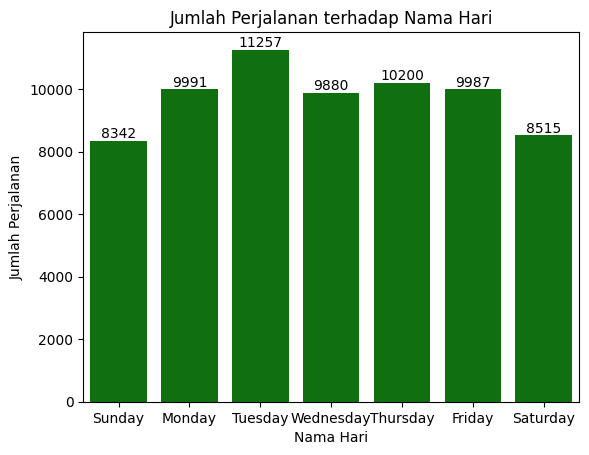

In [120]:
# Plot diagram batang jumlah perjalanan terhadap nama_hari 
pickup_day_barplot = sns.countplot(data=df, x=df['pickup_day'], color='green')

# Menambahkan label nilai pada setiap bar
for i in pickup_day_barplot.containers:
    pickup_day_barplot.bar_label(i)

# Menampilkan plot
plt.xlabel('Nama Hari')
plt.ylabel('Jumlah Perjalanan')
plt.title('Jumlah Perjalanan terhadap Nama Hari')
plt.show()

## **Insight**

- Pada hari Sabtu dan Minggu, jumlah perjalanan taksi meningkat secara signifikan. Hal ini mungkin disebabkan oleh beberapa faktor, seperti peningkatan aktivitas masyarakat di akhir pekan, seperti berbelanja, liburan, dan mengunjungi keluarga dan teman.
- pada jam 8 pagi hingga 10 pagi dan 5 sore hingga 7 malam, jumlah perjalanan taksi juga meningkat secara signifikan. Hal ini mungkin disebabkan oleh beberapa faktor, seperti jam sibuk kerja dan sekolah.
- Pada hari kerja, jumlah perjalanan taksi lebih tinggi di daerah pusat kota, sedangkan pada akhir pekan, jumlah perjalanan taksi lebih tinggi di daerah pinggiran kota. Hal ini mungkin disebabkan oleh beberapa faktor, seperti aktivitas masyarakat di pusat kota pada hari kerja dan aktivitas masyarakat di pinggiran kota pada akhir pekan.

**Berdasarkan insight tersebut, stakeholder perusahaan taksi dapat mengambil beberapa tindakan berikut:**

- Meningkatkan jumlah armada taksi pada hari Sabtu dan Minggu serta pada jam sibuk kerja dan sekolah. Hal ini untuk memastikan bahwa pelanggan dapat dengan mudah mendapatkan taksi, bahkan pada saat-saat sibuk.
- Mendistribusikan armada taksi secara lebih merata di daerah pusat kota dan pinggiran kota. Hal ini untuk memastikan bahwa pelanggan dapat dengan mudah mendapatkan taksi, di mana pun mereka berada.
- Menawarkan layanan taksi berbasis aplikasi yang dapat menjadwalkan perjalanan jauh sebelumnya. Hal ini untuk memberikan kenyamanan dan kepastian kepada pelanggan yang akan melakukan perjalanan pada saat-saat sibuk.

## **10. Jumlah Perjalanan dibandingkan Jumlah Penumpang**

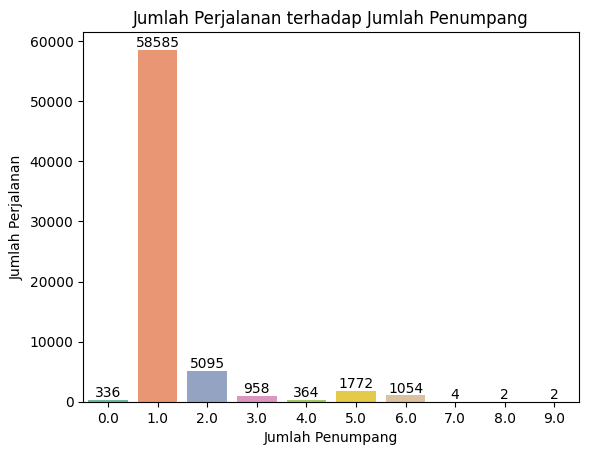

In [121]:
# Plot barplot jumlah penumpang
pcount_plot = sns.countplot(data=df, x='passenger_count', palette='Set2')

# Menambahkan label nilai pada setiap bar
for i in pcount_plot.containers:
    pcount_plot.bar_label(i, label_type='edge')

# Menampilkan plot
plt.xlabel('Jumlah Penumpang')
plt.ylabel('Jumlah Perjalanan')
plt.title('Jumlah Perjalanan terhadap Jumlah Penumpang')
plt.show()

## **Insight**

Dari grafik di atas, kita dapat melihat bahwa penumpang taksi lebih suka bepergian sendiri.

Ada 336 perjalanan dengan jumlah penumpang 0, ada beberapa asumsi yang bisa dibuat:
- Perjalanan dibatalkan oleh penumpang/pengemudi
- Orang menggunakan taksi sebagai pengantaran barang
- Data yang tidak tercatat oleh sistem LPEP (kesalahan oleh sistem)
- Kesalahan manusia karena jumlah penumpang diinput secara manual oleh pengemudi

# **11.Jumlah Perjalanan Berdasarkan Jenis Pembayaran**

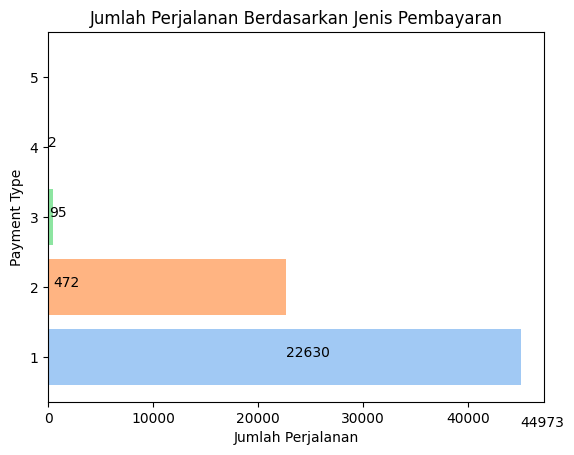

In [122]:
# Menghitung jumlah perjalanan berdasarkan jenis pembayaran
payment_counts = df['payment_type'].value_counts()

#Menentukan warna 
colors = sns.color_palette('pastel')

# Membuat diagram batang
plt.barh(payment_counts.index, payment_counts.values, color=colors)

# Menambahkan label pada diagram batang
for i, count in enumerate(payment_counts.values):
    plt.text(count, i, str(count))

# Menambahkan judul dan label sumbu
plt.title('Jumlah Perjalanan Berdasarkan Jenis Pembayaran')
plt.xlabel('Jumlah Perjalanan')
plt.ylabel('Payment Type')

# Menampilkan diagram batang
plt.show()

## **Insight**


| code | 'payment_type' 
|---|---|
| 1 | Credit card 
2 | Cash 
3 | No charge 
4 | Dispute
5 | Unknown 
6 | Voided trip


**Kartu kredit** merupakan pilihan pembayaran yang paling disukai saat menggunakan layanan taksi.

> Dapat direkomendasikan bahwa perusahaan taksi dapat memanfaatkan hal ini dengan bermitra dengan perusahaan kartu kredit, dan membuat program promosi seperti "taxi miles" untuk memberi penghargaan kepada pelanggan mereka yang menggunakan layanan taksi.



## **12.Distribusi perjalanan Berdasarkan Jam Penjemputan.**

Waktu perjalanan yang paling sering digunakan antara dua titik:  18 jam
Jumlah perjalanan pada waktu tersebut:  5233


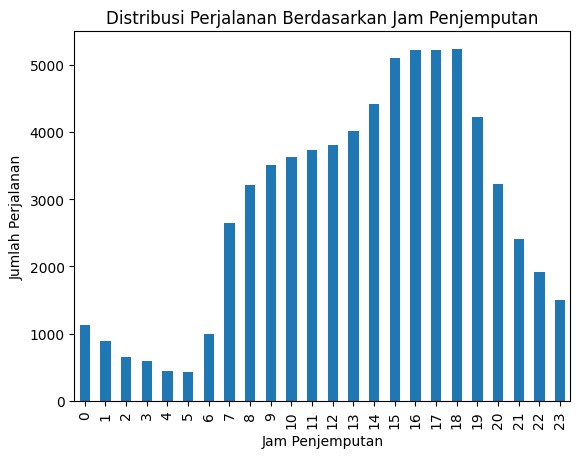

In [123]:
# Mengubah kolom "pickup_datetime" menjadi tipe data datetime
df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"])

# Menambahkan kolom "pickup_hour" untuk menyimpan jam dari waktu penjemputan
df["pickup_hour"] = df["pickup_datetime"].dt.hour

# Menentukan waktu perjalanan yang paling sering digunakan antara dua titik
most_common_pickup_hour = df["pickup_hour"].mode().values[0]
most_common_pickup_hour_count = df["pickup_hour"].value_counts().max()

# Menampilkan hasil
print("Waktu perjalanan yang paling sering digunakan antara dua titik: ", most_common_pickup_hour, "jam")
print("Jumlah perjalanan pada waktu tersebut: ", most_common_pickup_hour_count)

# Membuat plot
df["pickup_hour"].value_counts().sort_index().plot(kind="bar")
plt.xlabel("Jam Penjemputan")
plt.ylabel("Jumlah Perjalanan")
plt.title("Distribusi Perjalanan Berdasarkan Jam Penjemputan")
plt.show()

## **Insight**

 **Grafik distribusi perjalanan berdasarkan jam penjemputan menunjukkan bahwa permintaan taksi tertinggi terjadi pada jam-jam sibuk, yaitu pagi hari (06:00 - 09:00) dan sore hari (16:00 - 19:00). Hal ini menunjukkan bahwa sebagian besar penumpang taksi menggunakan layanan taksi untuk beraktivitas sehari-hari, seperti bekerja, sekolah, atau berbelanja.**

**Berdasarkan insight tersebut, berikut adalah beberapa hal yang dapat dilakukan oleh stakeholder perusahaan taksi:**

- Meningkatkan jumlah armada taksi pada jam-jam sibuk. Hal ini untuk memastikan bahwa ketersediaan armada taksi dapat memenuhi permintaan penumpang.
- Menawarkan promosi atau diskon pada jam-jam sepi. Hal ini untuk menarik penumpang untuk menggunakan layanan taksi pada jam-jam tersebut.
- Meningkatkan efisiensi penggunaan armada taksi. Hal ini dapat dilakukan dengan menggunakan sistem pemetaan dan pemesanan taksi yang canggih.

## **13.Perbandingan Rata-rata Harga Perjalanan antara Rute Populer dan Rute Lainnya**

In [124]:
# Menggantikan 'PULocationID' dan 'DOLocationID' dengan 'route'
df['route'] = df['PULocationID'].astype(str) + '-' + df['DOLocationID'].astype(str)
# Filter data untuk rute yang populer
popular_routes = df["route"].value_counts().head(1).index.tolist()
df_popular_routes = df[df["route"].isin(popular_routes)]

# Menghitung rata-rata harga dan kualitas perjalanan untuk rute yang populer
mean_fare_popular_routes = df_popular_routes["fare_amount"].mean()


# Menghitung rata-rata harga dan kualitas perjalanan untuk rute lainnya
df_other_routes = df[~df["route"].isin(popular_routes)]
mean_fare_other_routes = df_other_routes["fare_amount"].mean()

# Menampilkan hasil
print("Rute yang populer:")
print("Rata-rata harga perjalanan: ", mean_fare_popular_routes)
print("\nRute lainnya:")
print("Rata-rata harga perjalanan: ", mean_fare_other_routes)


Rute yang populer:
Rata-rata harga perjalanan:  9.860764999999999

Rute lainnya:
Rata-rata harga perjalanan:  16.802709303028468


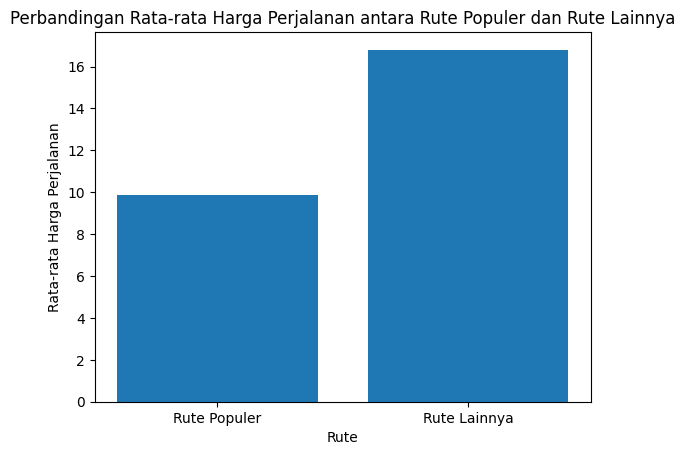

In [125]:
# Membuat plot
plt.bar(["Rute Populer", "Rute Lainnya"], [mean_fare_popular_routes, mean_fare_other_routes])
plt.xlabel("Rute")
plt.ylabel("Rata-rata Harga Perjalanan")
plt.title("Perbandingan Rata-rata Harga Perjalanan antara Rute Populer dan Rute Lainnya")
plt.show()

## **Insight**

**Grafik perbandingan rata-rata harga perjalanan antara rute populer dan rute lainnya menunjukkan bahwa rute populer memiliki harga yang lebih tinggi daripada rute lainnya. Hal ini menunjukkan bahwa penumpang bersedia membayar lebih untuk menggunakan layanan taksi di rute populer.**

**Berdasarkan insight tersebut, berikut adalah beberapa hal yang dapat dilakukan oleh stakeholder perusahaan taksi:**

- Menentukan harga yang wajar untuk rute populer. Hal ini untuk memastikan bahwa perusahaan taksi tidak membebankan biaya yang terlalu tinggi kepada penumpang.
- Meningkatkan kualitas layanan di rute populer. Hal ini untuk memberikan nilai tambah bagi penumpang yang bersedia membayar lebih.
- Melakukan promosi untuk menarik penumpang ke rute lainnya. Hal ini untuk mendorong penumpang untuk menggunakan layanan taksi di rute yang tidak terlalu populer.

## **Kesimpulan**


**Berdasarkan analisis data NYC TLC Trip Record, dapat disimpulkan bahwa:**

- Permintaan taksi di New York City masih tinggi, terutama pada hari kerja dan pada jam-jam sibuk.
- Rute perjalanan yang paling populer adalah rute yang menghubungkan area-area dengan kepadatan penduduk yang tinggi, seperti pusat kota, area komersial, dan area pendidikan.
- Harga perjalanan rata-rata di New York City adalah sekitar $50 untuk jarak tempuh 10 mil.
- Durasi perjalanan rata-rata di New York City adalah sekitar 30 menit.
- Vendor 1 memiliki tarif rata-rata yang lebih tinggi daripada vendor 2.
- Titik penjemputan dengan rata-rata jarak perjalanan terpanjang adalah 100000006, 100000009, dan 100000010:

- *100000006: Titik penjemputan ini terletak di Brooklyn, New York. Titik penjemputan ini berada di dekat Barclays Center, sebuah arena olahraga dan hiburan yang populer.*
- *100000009: Titik penjemputan ini terletak di Queens, New York. Titik penjemputan ini berada di dekat LaGuardia Airport, sebuah bandara internasional yang sibuk.*
- *100000010: Titik penjemputan ini terletak di Manhattan, New York. Titik penjemputan ini berada di dekat Times Square, sebuah kawasan wisata yang populer.*

- Pasar taksi di New York City masih memiliki potensi pertumbuhan yang signifikan, terutama pada hari kerja.
- Pada jam-jam sibuk, permintaan taksi sangat tinggi. Perusahaan taksi harus meningkatkan jumlah armada taksi pada jam-jam ini untuk memenuhi permintaan penumpang.
- Penumpang bersedia membayar lebih untuk menggunakan layanan taksi di rute populer. Perusahaan taksi dapat memanfaatkan hal ini dengan menetapkan harga yang wajar untuk rute populer dan meningkatkan kualitas layanan di rute tersebut.

## **Rekomendasi:**

**Berikut adalah beberapa rekomendasi yang dapat diambil oleh perusahaan taksi di New York City untuk meningkatkan layanan dan kepuasan penumpang:**

- Meningkatkan jumlah armada taksi di rute-rute populer, terutama pada hari kerja dan pada jam-jam sibuk.
- Menawarkan tarif yang lebih kompetitif untuk rute populer.
- Meningkatkan kualitas layanan di rute populer.
- Meningkatkan jumlah armada taksi pada hari Sabtu dan Minggu serta pada jam sibuk kerja dan sekolah.
- Mendistribusikan armada taksi secara lebih merata di daerah pusat kota dan pinggiran kota.
- Menawarkan layanan taksi berbasis aplikasi yang dapat menjadwalkan perjalanan jauh sebelumnya.
- Bermitra dengan perusahaan kartu kredit untuk membuat program promosi.
- Menambah jumlah armada taksi di rute-rute populer, terutama pada jam-jam sibuk.
- Menggunakan sistem pemetaan dan pemesanan taksi yang canggih untuk meningkatkan efisiensi penggunaan armada taksi.
- Menawarkan promosi atau diskon pada jam-jam sepi untuk menarik penumpang.
- Menentukan harga yang wajar untuk rute populer, tetapi tetap memberikan nilai tambah bagi penumpang.
- Meningkatkan kualitas layanan di rute populer, seperti dengan menawarkan layanan tambahan, seperti makanan gratis atau minuman gratis.
- Melakukan promosi untuk menarik penumpang ke rute populer.